<a href="https://colab.research.google.com/github/saprativa/cs725-project/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [12]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
						train = True,
						download = True,
						transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
									batch_size = 32,
									shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 433590697.85it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29175263.45it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 59228640.16it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 15425529.37it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [34]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()

		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(6, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 2)
		)

		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(2, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 6),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return encoded,decoded

In [41]:
data = pd.read_csv('/content/pulsar_data_train.csv')
cols = data.columns
y = data['target_class']
X = data.drop(['target_class'],axis=1)
#scale = StandardScaler()
#Xsc = scale.fit_transform(X)
X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=float)
print(X.shape)
X_train = torch.from_numpy(X)

(12528, 6)


In [42]:
# Model Initialization
model = AE().to(torch.float64)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-1,
							weight_decay = 1e-8)


Text(0, 0.5, 'Loss')

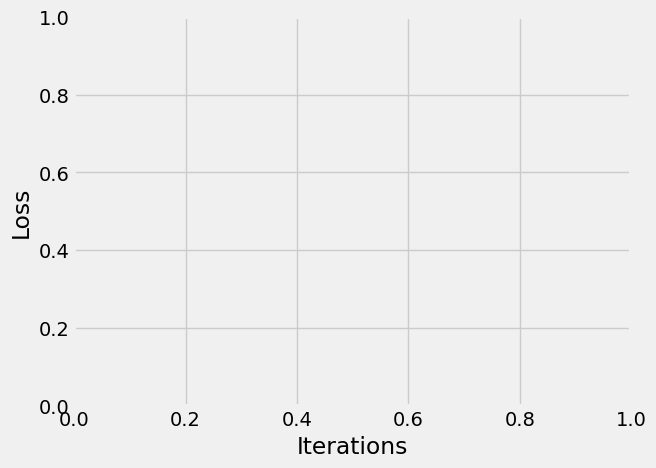

In [43]:
epochs = 5
outputs = []
losses = []
for epoch in range(epochs):
  for data in X_train:

    # Output of Autoencoder
    _,reconstructed = model(data)

    # Calculating the loss function
    loss = loss_function(reconstructed, data)

    # The gradients are set to zero,
    # the gradient is computed and stored.
    # .step() performs parameter update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Storing the losses in a list for plotting
    losses.append(loss.item())
  #outputs.append((epochs, data, reconstructed))

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
#plt.plot(losses.item()[-100:])

In [44]:
for data in X_train:
  optimizer.zero_grad()
  encoded,_ = model(data)
  print(data,encoded)
  input()

tensor([ 1.2116e+02,  4.8373e+01, -1.3165e-02,  3.1689e+00,  7.4499e+00,
         6.5159e+01], dtype=torch.float64) tensor([-8.7577e-316, -1.0510e-315], dtype=torch.float64,
       grad_fn=<AddBackward0>)

tensor([ 76.9688,  36.1756,   3.3887,   2.3997,   9.4147, 102.7230],
       dtype=torch.float64) tensor([-8.7577e-316, -1.0510e-315], dtype=torch.float64,
       grad_fn=<AddBackward0>)

tensor([130.5859,  53.2295,  -0.2972,   2.7433,   8.5084,  74.0313],
       dtype=torch.float64) tensor([-8.7577e-316, -1.0510e-315], dtype=torch.float64,
       grad_fn=<AddBackward0>)


KeyboardInterrupt: ignored